In [2]:
from datascience import *
import numpy as np
from math import *
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

## Lesson 30: Properties of Estimators

Now that we have seen two different ways to obtain parameter estimates, we will now look into ways to evaluate estimators. What makes an estimator a good estimator? We have briefly discussed bias, but we'll also discuss consistency. 

### Bias

(Review from Lesson 28). If we use an iid random sample to obtain an estimate of some parameter $\theta$, this estimate ($\hat{\theta}$) is a random variable. Each time I collect a new sample, I will get a different $\hat{\theta}$. Ideally, the distribution of this $\hat{\theta}$ should have an average (expected value) of $\theta$. 

If $E(\hat{\theta})=\theta$, then $\hat{\theta}$ is said to be unbiased. 

### Example 1: Uniform Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the continuous uniform distribution on the domain $0 \leq X \leq b$ with unknown parameter $b$. From lessons 28, we found that the method of moments estimate of $b$ is $2\bar{X}$. 

Is this estimate biased? Particularly, find $E(2\bar{X})$. 


$$
2 E(\bar{X}) = 2 * E({x_1+x_2+...x_n \over n})
$$
Where $x_1+x_2+...x_n$ are all equal to $b/2$
$$
2 E(\bar{X}) = 2 * {b \over 2}
$$

$$
E(2 \bar{X}) = b
$$

### Example 2: Exponential Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the exponential distribution with unknown parameter $\lambda$. From lessons 28 and 29, we found that the method of moments and maximum likelihood estimates are both $\frac{1}{\bar{X}}$. 

Is this estimate biased? For this exercise, assume $\lambda=5$ and the size of each sample is 20. You will probably find it easier to do this via simulation (use `scipy` to generate a random sample from the exponential distribution with your choice of $\lambda$. Use this sample to obtain the estimate. Repeat this process many times to get a distribution $\hat{\lambda}$.) 

In [3]:
EVs = make_array()

for i in np.arange(10000):
    samp = stats.expon.rvs(scale=1/5, size=1000)
    LE = 1/np.mean(samp)
    EVs = np.append(EVs, LE)

ev_est = np.mean(EVs)
ev_est

5.005931850789809

To test for bias, check if $E(\bar{X}) = \lambda$:
$$
\lambda = \sum {1 \over \bar{X}}
$$
Where $\lambda = 5$ 
$$
5 = 5.27
$$
Ergo, expon is biased, but as you use bigger sample sizes, it will become closer. 

If the sample size is increased to 1000, then ${1 \over \bar{X}} = 5.0037$. Thus:
$$
5 = 5
$$

## Consistency

An estimator is considered consistent if for any $\epsilon >0$, 

$$
\underset{n \to \infty}{\lim} P(|\hat{\theta}_n -\theta|<\epsilon)=1
$$

This is just a fancy way of saying that as $n$ increases, the estimator tends to get closer to $\theta$. 

### Lemma

An estimator is consistent if it is unbiased and if $\underset{n \to \infty}{\lim} Var(\hat{\theta}_n)=0$. In other words, an unbiased estimator is consistent if its variance goes to zero as sample size goes to infinity. 

### Example 3: Uniform Distribution

In Example 1, we showed that the method of moments estimator for $b$ is unbiased. Is it also consistent? What is the variance of this estimator? What happens to this variance as $n$ increases? 

We already checked bias, so we can move straight to variance...
$$
Var(2\bar{X}) = 4 * Var(\bar{X}) = {4 \over n^2} Var(x_1 + x_2 + ... x_n)
$$
We know that $Var(x_i) = {b^2 \over 12}$, so:
$$
Var(2\bar{X}) = {b^2 \over n}
$$
As $n$ approaches infinity, we go to 0.

### Example 4: Normal Distribution

Suppose $X_1,X_2,...,X_n$ is an iid sequence of random variables from the normal distribution with unknown mean and standard deviation. The method of moments (and maximum likelihood) estimator of $\mu$ is simply $\bar{X}$. We have already established that this estimate is unbiased. Is it consistent? 

$$
\underset{n \to \infty}{\lim} Var(\bar{X}) = \underset{n \to \infty}{\lim} \sigma^{2 \over n} = 0
$$
Thus, is consistent.

## Weak Law of Large Numbers

It turns out that for all distributions, the sample mean is a consistent estimator for the population mean. This is known as the Weak Law of Large Numbers. 

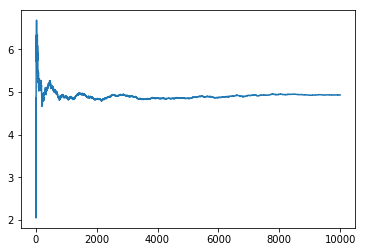

In [4]:
ns=np.arange(1,10001)
samp=stats.norm.rvs(5,6,size=10000)
sampmeans=np.cumsum(samp)/ns
plt.plot(ns,sampmeans)
plt.show()